**TRANSFER LEARNING**

**Transfer Learning** is taking the patterns (also called weights) another model has learned from another problem and using them for our own problem. 

**Two main benefits of using TL** 
> 1. Can leverage an existing neural network architecture proven to work on problems similar to our own. 

> 2.  instead of hand-crafting our own neural network architectures or building them from scratch, we can utilise models which have worked for others and **achieve great results with less data.**

**Using a GPU**

In [1]:
!nvidia-smi

Mon Jan 16 23:16:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Transfer Learning with TensorFlow Hub: Getting great results with 10% of the data**

[TensorFlow Hub](https://tfhub.dev/) ia a repository for existing model components where I can import and use a fully trained model with as little as a URL

### **Download and get familiar with data**

In [2]:
import zipfile 

# download data 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 


--2023-01-16 23:16:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   202MB/s    in 0.8s    

2023-01-16 23:16:52 (202 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# unzip the downloaded data 
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
# how many images in each folder 
import os

# walk through 10% data directory and list number of files 
for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'): 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

**Creating Data Loaders(preparing the data)**

In [5]:
# set up data inputs 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

image_shape = (224, 224)
batch_size = 32 

train_dir = '10_food_classes_10_percent/train/' 
test_dir = '10_food_classes_10_percent/test/'

In [6]:
#Rescale 
train_datagen = ImageDataGenerator(rescale = 1 / 255.0)
test_datagen = ImageDataGenerator(rescale = 1 / 255.0)

In [7]:
print('Training images')
train_data_10_percent = train_datagen.flow_from_directory(train_dir, 
                                                          target_size = image_shape, 
                                                          batch_size = batch_size, 
                                                          class_mode = 'categorical') 

print('Testing images')
test_data_10_percent = train_datagen.flow_from_directory(test_dir, 
                                                          target_size = image_shape, 
                                                          batch_size = batch_size, 
                                                          class_mode = 'categorical')

Training images
Found 750 images belonging to 10 classes.
Testing images
Found 2500 images belonging to 10 classes.


### **Setting up callbacks (things to run while our model trains)**

[Callbacks]('https://www.tensorflow.org/api_docs/python/tf/keras/callbacks') are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include: 

- [Experiment tracking with TensorBoard]('https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard') - log the performance of multiple models and then view and compare these models in a visual way on - [TensorBoard]('https://www.tensorflow.org/tensorboard') (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data. 

- [Model Checkpointing]('https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint') - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting 

- [Early stopping]('https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping') - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.

### **Create a Function that creates a TensorBoard callback for us**

In [16]:
import datetime 
def create_tensorboard_callback(dir_name, experiment_name): 
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  ) 
  print(f'Saving TensorBoard log files to: {log_dir}')
  return tensorboard_callback

- **dir_name** is the overall logs directory
- **experiment_name** is the particular experiment
- **current_timestamp** is the time the experiment started based on Python's datetime.datetime().now()

### **Creating models using TensorFlow Hub** 

> 1. [ResNetV2]('https://arxiv.org/abs/1603.05027') - a state of the art computer vision model architecture from 2016. 
> 2. [EfficientNet]('https://arxiv.org/abs/1905.11946') - a state of art computer vision architecture from 2019.

In [9]:
import tensorflow as tf 
import tensorflow_hub as hub 
from tensorflow.keras import layers

In [10]:
# resnet 50 V2 feature vector 
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

# efficientNetB0 feature vector 
efficient_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

### Since we're going to be comparing two models, to save ourselves code, we'll create a function **create_model()**

In [11]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """ 

  # Download the pretrained model and save it as a keras layer 
  feature_extractor_layer = hub.KerasLayer(model_url, 
                                           trainable = False, 
                                           name = 'feature_extraction_layer', 
                                           input_shape = image_shape+(3,)) 
  
  # create our own model 
  model = tf.keras.Sequential([
      feature_extractor_layer, 
      layers.Dense(num_classes, activation = 'softmax', 
                   name = 'output_layer')
  ]) 
  return model

### **ResNetV250**

In [12]:
# create model 
resnet_model = create_model(resnet_url, 
                            num_classes = train_data_10_percent.num_classes) 

# compile the model 
resnet_model.compile(loss = 'categorical_crossentropy', 
                     optimizer = tf.keras.optimizers.Adam(), 
                     metrics = ['accuracy'])

In [17]:
# fit the model 
resnet_history = resnet_model.fit(
    train_data_10_percent, epochs = 5, 
    steps_per_epoch = len(train_data_10_percent), 
    validation_data = test_data_10_percent, 
    validation_steps = len(test_data_10_percent), 
    callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub', 
                                             experiment_name = 'ResNetV250')]
) 

Saving TensorBoard log files to: tensorflow_hub/ResNetV250/20230116-231917
Epoch 1/5
24/24 [==============================] - 29s 756ms/step - loss: 2.0275 - accuracy: 0.3320 - val_loss: 1.2537 - val_accuracy: 0.6032
Epoch 2/5
24/24 [==============================] - 16s 682ms/step - loss: 0.9579 - accuracy: 0.7040 - val_loss: 0.8989 - val_accuracy: 0.7096
Epoch 3/5
24/24 [==============================] - 16s 681ms/step - loss: 0.6481 - accuracy: 0.8067 - val_loss: 0.7617 - val_accuracy: 0.7552
Epoch 4/5
24/24 [==============================] - 16s 678ms/step - loss: 0.4965 - accuracy: 0.8693 - val_loss: 0.7072 - val_accuracy: 0.7720
Epoch 5/5
24/24 [==============================] - 16s 679ms/step - loss: 0.3954 - accuracy: 0.9067 - val_loss: 0.6792 - val_accuracy: 0.7772


### **Plot loss curves**

In [18]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

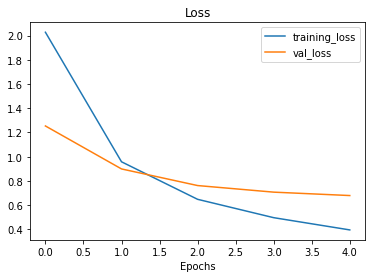

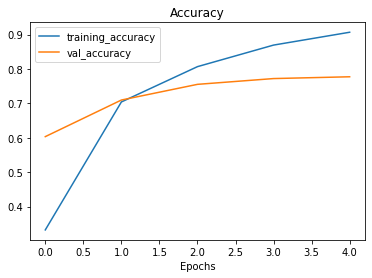

In [19]:
plot_loss_curves(resnet_history)

### **Model summary**

In [20]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


### **EfficientNetB0**

In [26]:
# create model 
efficientNet_model = create_model(efficient_url, 
                            num_classes = train_data_10_percent.num_classes) 

# compile the model 
efficientNet_model.compile(loss = 'categorical_crossentropy', 
                     optimizer = tf.keras.optimizers.Adam(), 
                     metrics = ['accuracy'])

In [27]:
# fit the model 
efficientNet_history = efficientNet_model.fit(
    train_data_10_percent, epochs = 5, 
    steps_per_epoch = len(train_data_10_percent), 
    validation_data = test_data_10_percent, 
    validation_steps = len(test_data_10_percent), 
    callbacks = [create_tensorboard_callback(dir_name = 'tensorflow_hub', 
                                             experiment_name = 'EfficientNetB0')]
) 

Saving TensorBoard log files to: tensorflow_hub/EfficientNetB0/20230116-234304
Epoch 1/5
24/24 [==============================] - 25s 729ms/step - loss: 1.8278 - accuracy: 0.4467 - val_loss: 1.2903 - val_accuracy: 0.7444
Epoch 2/5
24/24 [==============================] - 15s 664ms/step - loss: 1.0346 - accuracy: 0.8093 - val_loss: 0.8646 - val_accuracy: 0.8204
Epoch 3/5
24/24 [==============================] - 16s 696ms/step - loss: 0.7407 - accuracy: 0.8547 - val_loss: 0.6938 - val_accuracy: 0.8424
Epoch 4/5
24/24 [==============================] - 15s 659ms/step - loss: 0.5948 - accuracy: 0.8747 - val_loss: 0.6054 - val_accuracy: 0.8560
Epoch 5/5
24/24 [==============================] - 15s 665ms/step - loss: 0.5009 - accuracy: 0.8960 - val_loss: 0.5540 - val_accuracy: 0.8628


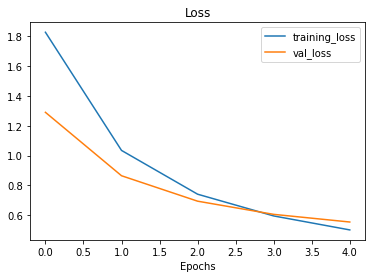

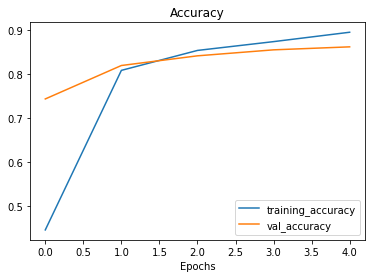

In [28]:
plot_loss_curves(efficientNet_history)

In [29]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


### **Comparing Models using TensorBoard**

- Since we set up a TensorBoard callback, all of our model's training logs have been saved automatically. To visualize them, we can upload the results to [TensorBoard.dev]('https://tensorboard.dev/')

In [30]:
# upload TensorBoard dev records 
!tensorboard dev upload --logdir ./tensorflow_hub/ \ 
  --name 'EfficientNetB0 vs ResNet50V2' \ 
  --description 'Comparing two different TF Hub feature extraction model'
  --one_shot

IndentationError: ignored

In [31]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=FYz0oDANwwEEFz50LKvIUvC68XoKYy&prompt=consent&access_type=off

In [33]:
# tensorboard dev list - check out experiments
!tensorboard dev list

https://tensorboard.dev/experiment/NhJDn9S6Swu6rzflqNHKYg/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   NhJDn9S6Swu6rzflqNHKYg
	Created              2023-01-16 23:56:31 (7 minutes ago)
	Updated              2023-01-16 23:56:34 (7 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  7518608
Total: 1 experiment(s)


In [ ]:
# Delete an experiment 
!tensorboard dev delete --experiment id ###########